In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error

In [2]:
iris = load_iris() 
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X, y = data.iloc[:, [0, 2]], iris.target

In [4]:
X.shape, y.shape

((150, 2), (150,))

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

In [26]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
knn.predict(observation_new_scaled)
knn.predict_proba(observation_new_scaled)
distances, indices = knn.kneighbors(observation_new_scaled)

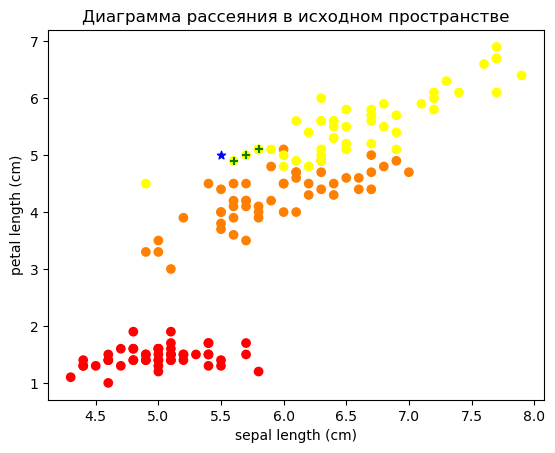

In [27]:
observation_new_original = scaler.inverse_transform(observation_new_scaled)
neighbors_original = scaler.inverse_transform(X_scaled[indices[0]])

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_original[0][0], observation_new_original[0][1], marker='*', color='b')
plt.scatter(neighbors_original[:, 0], neighbors_original[:, 1], marker='+', color='g')

plt.title("Диаграмма рассеяния в исходном пространстве")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

In [29]:
import seaborn as sns

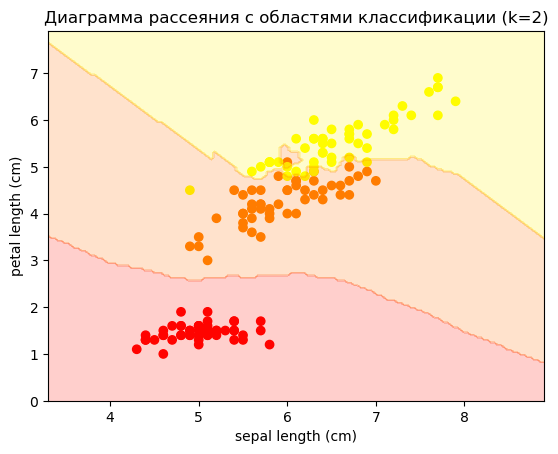

[[50  0  0]
 [ 0 50  0]
 [ 0  9 41]]


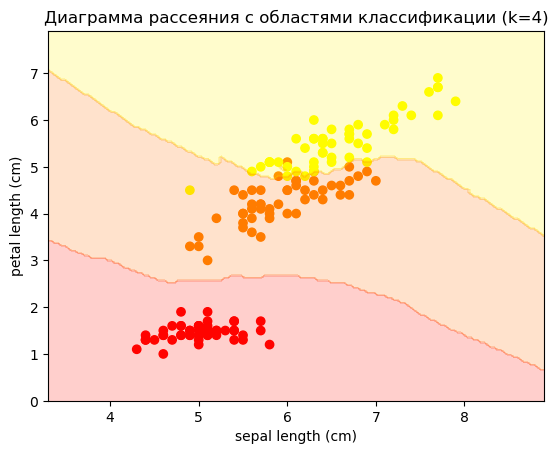

[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


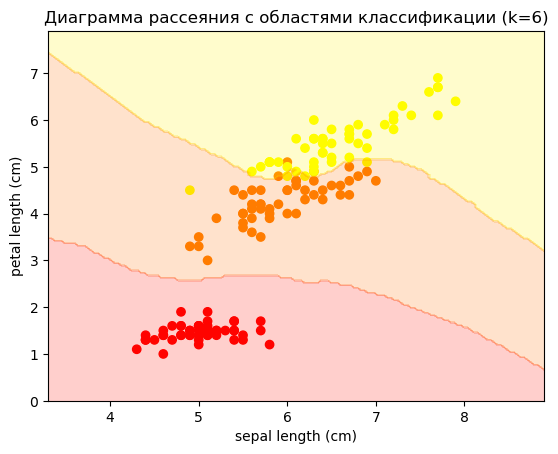

[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


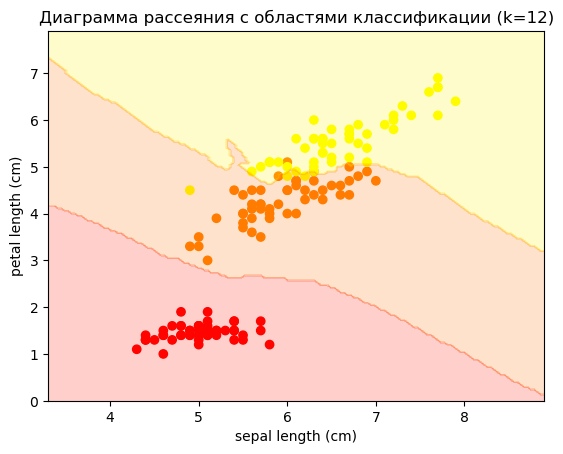

[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


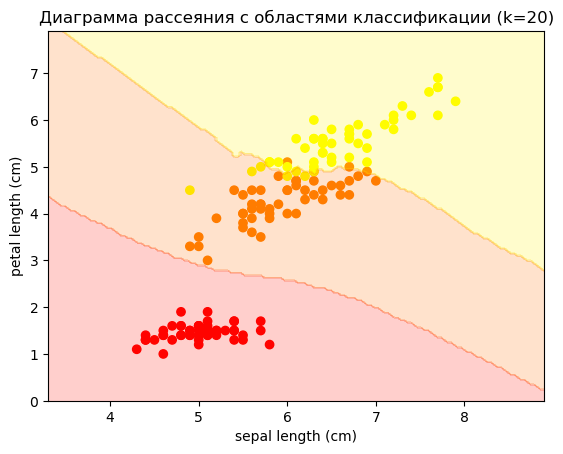

[[50  0  0]
 [ 0 46  4]
 [ 0  6 44]]


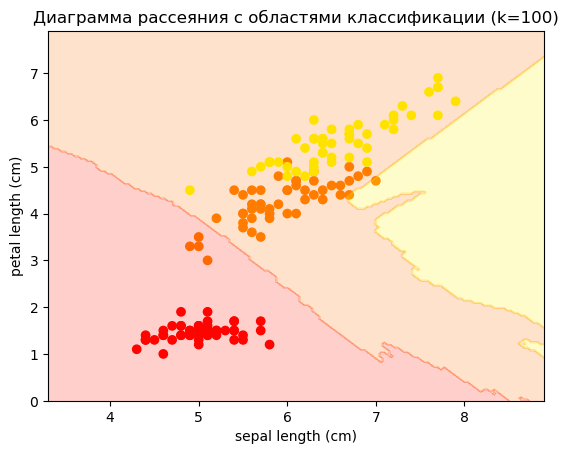

[[50  0  0]
 [ 4 45  1]
 [ 0 50  0]]


In [39]:
neighbors = [2, 4, 6, 12, 20, 100]

for i in neighbors:
    knn_2 = KNeighborsClassifier(n_neighbors=i)
    knn_2.fit(X_scaled, y)
    
    y_pred_2 = knn_2.predict(X_scaled)
    
    X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    
    XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
    XX_scaled = scaler.transform(XX)
    
    Z = knn_2.predict(XX_scaled).reshape(X0_grid.shape)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
    plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.title(f'Диаграмма рассеяния с областями классификации (k={i})')
    plt.show()
    print(confusion_matrix(y, y_pred_2))

3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

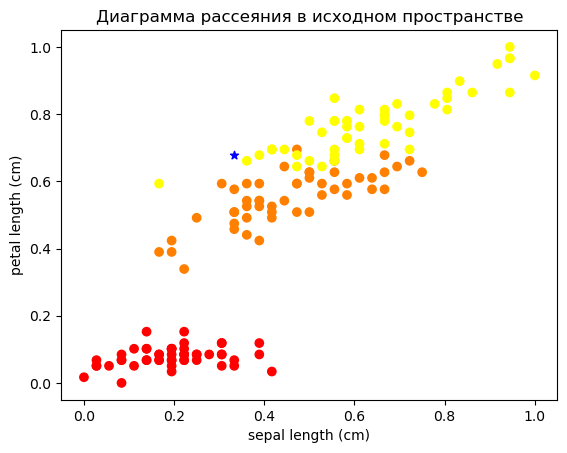

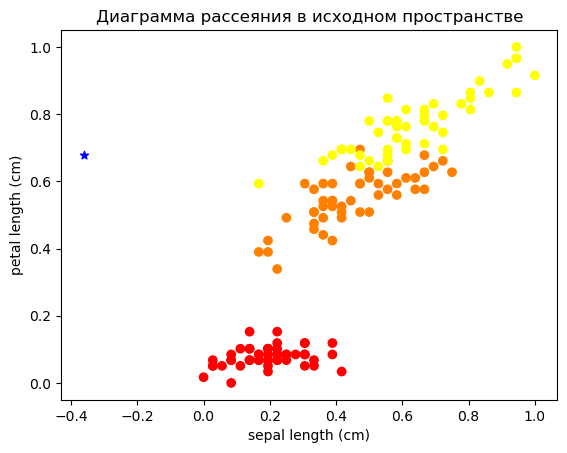

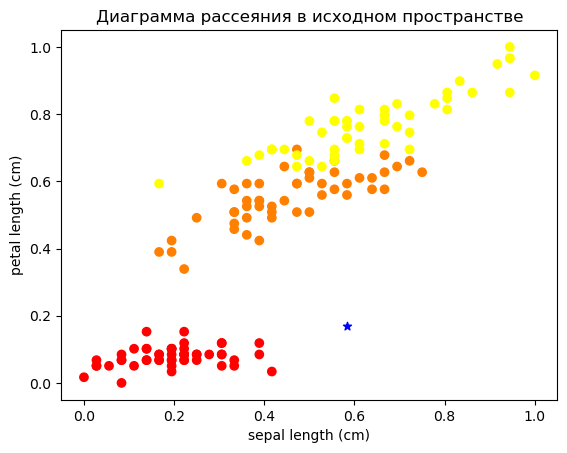

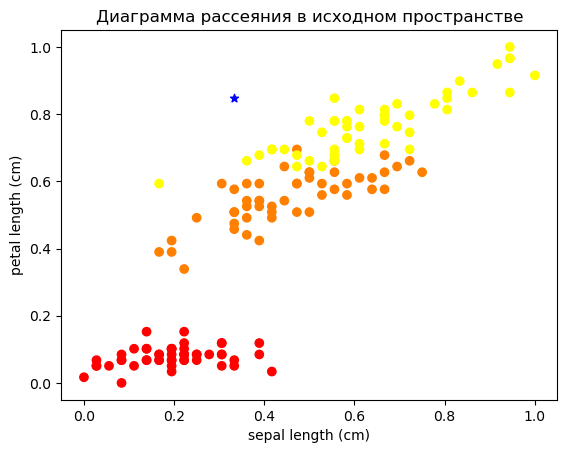

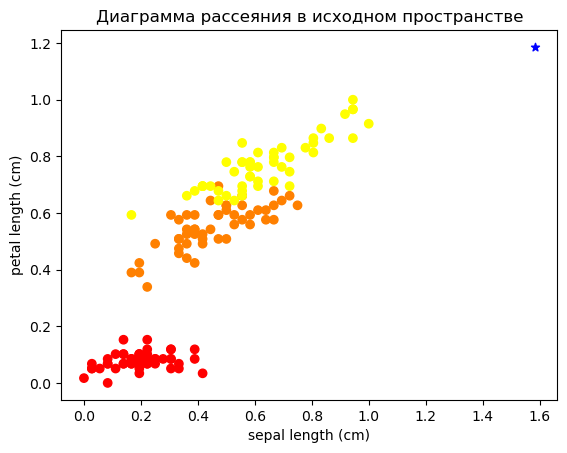

In [43]:
observation_new = [[5.5, 5], [3, 5], [6.4, 2], [5.5, 6], [10, 8]]

for point in observation_new:
    observation_new_scaled = scaler.transform(np.array(point).reshape(1, -1))
    knn.predict(observation_new_scaled)
    knn.predict_proba(observation_new_scaled)

    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

    plt.title("Диаграмма рассеяния в исходном пространстве")
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.show()

4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.